# １．データの導入

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('c:/pwork/ershoufang.csv', encoding='gbk')
df.head()

,id,title,price,unitprice,roomtype,floor,Total floor,direction,Construction time,area,...,Scale of households,Heating mode,Equipped with elevator,Listing time,Transaction ownership,Last transaction,usage of houses,Housing years,Ownership,mortgage
0,1,海淀西四环 精装三居 不临街 花园式小区 满五年唯一,865万,68175元/平米,3室1厅,中楼层,共12层,东,2003年建,玉阜嘉园,...,两梯八户,自供暖,有,2020/6/11,商品房,2005/7/7,普通住宅,满五年,非共有,无
1,2,盛嘉华苑 一居室 东向 看房方便,206万,35561元/平米,2室1厅,顶层,共18层,东,2012年建,盛嘉华苑,...,两梯六户,集中供暖,有,2020/6/9,限价商品房,2015/2/6,普通住宅,满五年,非共有,无
2,3,新都丽苑 3室2厅 599万,599万,48918元/平米,3室2厅,高楼层,共18层,南北,2002年建,新都丽苑,...,一梯两户,集中供暖,有,2020/6/2,商品房,2015/12/9,普通住宅,满两年,非共有,有
3,4,首座御园二期，满2年两梯四户板楼户型,315万,33504元/平米,2室1厅,中楼层,共14层,西南,2015年建,首座御园二区二期,...,一梯四户,集中供暖,有,2020/6/11,商品房,2018/4/23,普通住宅,满两年,非共有,无
4,5,房子空置，看房方便，南北通透，采光好。,451万,81867元/平米,2室1厅,中楼层,共5层,南北,1972年建,永安南里,...,一梯三户,集中供暖,无,2020/6/11,央产房,2011/4/18,普通住宅,满五年,非共有,无


# ２．データの整理とdescribe

In [7]:
df.columns

Index(['id', 'title', 'price', 'unitprice', 'roomtype', 'floor', 'Total floor',
       'direction', 'Construction time', 'area', 'region', 'street',
       'Distance Center', 'Building area', 'House structure', 'Inside area',
       'Building Type', 'building structure', 'Decoration',
       'Scale of households', 'Heating mode', 'Equipped with elevator',
       'Listing time', 'Transaction ownership', 'Last transaction',
       'usage of houses', 'Housing years', 'Ownership', 'mortgage'],
      dtype='object')

In [8]:
df['price'].replace("[^0-9]+", "", regex=True, inplace=True)
df['unitprice'].replace("[^0-9]+", "", regex=True, inplace=True)
df['Total floor'].replace("[^0-9]+", "", regex=True, inplace=True)
df['Construction time'].replace("[^0-9]+", "", regex=True, inplace=True)
df['Construction time'].replace("", np.nan, inplace=True)
df['Inside area'].replace("暂无数据", np.nan, inplace=True)
df['Construction time'].unique()
df[['price', 'unitprice', 'Total floor', 'Construction time', 'Inside area']] = df[['price', 'unitprice', 'Total floor', 'Construction time', 'Inside area']].astype('float')


In [11]:
df.describe().round(2)

,id,price,unitprice,Total floor,Construction time,Building area,Inside area
count,2812.00,2812.00,2812.00,2812.00,2757.00,2812.00,1504.00
mean,1406.50,522.84,64447.22,13.44,1999.81,80.41,72.90
std,811.90,388.82,27565.61,7.86,9.38,32.81,32.12
min,1.00,116.00,16889.00,2.00,1954.00,25.54,1.00
25%,703.75,320.00,44869.25,6.00,1993.00,58.74,52.68
50%,1406.50,437.50,57111.50,12.00,2001.00,73.66,68.27
75%,2109.25,599.00,77740.00,20.00,2007.00,91.91,82.91
max,2812.00,6299.00,181522.00,35.00,2017.00,373.34,337.78


# ３．変数選択

In [4]:
labelcolumns = ['roomtype', 'floor',
    'direction', 'area', 'region', 'street',
    'Distance Center', 'Building area', 'House structure',
    'Building Type', 'building structure', 'Decoration',
    'Scale of households', 'Heating mode', 'Equipped with elevator',
    'Transaction ownership', 
    'usage of houses', 'Housing years', 'Ownership', 'mortgage']

for label in labelcolumns:
    print(f'{label}: {df[label].unique()}, 累計{len(df[label].unique())}個。')

roomtype: ['3室1厅' '2室1厅' '3室2厅' '1室1厅' '2室2厅' '5室3厅' '1室0厅' '4室2厅' '4室3厅' '2室0厅'
 '4室1厅' '6室3厅' '5室2厅' '6室2厅' '3室0厅' '1室2厅' '3室3厅'], 累計17個。
floor: ['中楼层' '顶层' '高楼层' '低楼层' '底层' '地下室'], 累計6個。
direction: ['东' '南北' '西南' '东南' '西北' '东东南南' '南西北' '东南北' '南' '东北' '北南' '西南东南' '南西' '东西'
 '南东北' '西南北' '西' '北' '南西南' '南北西' '东西北' '西南南西' '北西南' '西东' '东南西北东北' '东南西南'
 '东南西' '东南西北' '北南西' '东南南' '西东北' '东西南' '西北南' '西南西北' '西南东北' '南北东' '东东北'
 '西北东' '南东' '南东南' '西西南'], 累計41個。
area: ['玉阜嘉园' '盛嘉华苑' '新都丽苑' ... '万福家园' '徜徉嘉园5号院' '康宁居'], 累計1688個。
region: ['海淀' '大兴' '石景山' '朝阳' '西城' '昌平' '通州' '丰台' '房山' '东城' '门头沟' '顺义' '亦庄开发区'
 '平谷'], 累計14個。
street: ['玉泉路' '枣园' '杨庄' '建国门外' '广安门' '朝阳门外' '回龙观' '官园' '武夷花园' '霍营' '望京' '潘家园'
 '新宫' '木樨园' '长阳' '田村' '北苑' '常营' '石佛营' '德胜门' '东关' '左安门' '门头沟其它' '阎村' '天通苑'
 '玉泉营' '马家堡' '中央别墅区' '方庄' '西红门' '农展馆' '亚运村' '马连洼' '五棵松' '首都机场' '朝青' '长椿街'
 '古城' '郁花园' '城子' '顺义其它' '十八里店' '鼓楼大街' '管庄' '青塔' '三元桥' '亦庄' '顺义城' '西坝河'
 '花乡' '万寿路' '四季青' '大峪' '西罗园' '后沙峪' '垡头' '定福庄' '双井' '朝阳门内' '通州北苑' '大兴其它'
 '马连道' '魏公村' '黄村北'

In [13]:
suiticolumns = ["price", "unitprice", "Total floor", "Construction time", "Building area", "Inside area"]
corr = df[suiticolumns].corr()
corr

,price,unitprice,Total floor,Construction time,Building area,Inside area
price,1.000000,0.389108,0.112227,0.075851,0.458072,0.456656
unitprice,0.389108,1.000000,-0.064038,-0.366448,-0.188074,-0.076246
Total floor,0.112227,-0.064038,1.000000,0.447639,0.184037,-0.057247
Construction time,0.075851,-0.366448,0.447639,1.000000,0.407773,0.206616
Building area,0.458072,-0.188074,0.184037,0.407773,1.000000,0.980557
Inside area,0.456656,-0.076246,-0.057247,0.206616,0.980557,1.000000


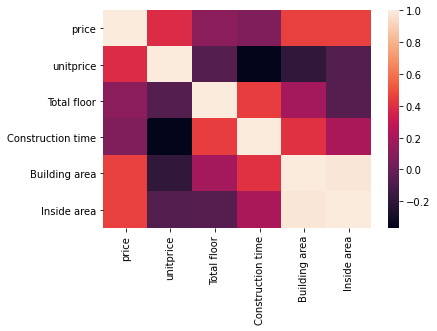

In [14]:
import seaborn as sns
sns.heatmap(corr)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
linear = LinearRegression()
tree = DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import train_test_split
y = np.log(df['unitprice'])

In [22]:
y

0       11.129833
1       10.479005
2       10.797901
3       10.419420
4       11.312851
          ...    
2807    11.174567
2808    11.114029
2809    10.535743
2810    10.608835
2811    11.193409
Name: unitprice, Length: 2812, dtype: float64

In [26]:
for i in suiticolumns:
    X_train, X_test, y_train, y_test = train_test_split(df[[i]].fillna(df[[i]].mean()), y)
    linear.fit(X_train, y_train)
    print(f'{i}だけ予測の精度：{linear.score(X_train, y_train).round(3), linear.score(X_test, y_test).round(3)}.')

priceだけ予測の精度：(0.145, 0.16).
unitpriceだけ予測の精度：(0.94, 0.93).
Total floorだけ予測の精度：(0.001, -0.001).
Construction timeだけ予測の精度：(0.137, 0.099).
Building areaだけ予測の精度：(0.03, 0.047).
Inside areaだけ予測の精度：(0.007, -0.012).


In [29]:
for i in labelcolumns:
    X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df[[i]]),  y)
    linear.fit(X_train, y_train)
    print(f'{i}だけ予測の精度：{linear.score(X_train, y_train).round(3), linear.score(X_test, y_test).round(3)}.')

roomtypeだけ予測の精度：(0.04, -1.3010724453173934e+22).
floorだけ予測の精度：(0.002, -0.005).
directionだけ予測の精度：(0.042, -7.215984241795093e+23).
areaだけ予測の精度：(0.945, -1.2921666769139262e+28).
regionだけ予測の精度：(0.71, 0.702).
streetだけ予測の精度：(0.865, -8.86072400191282e+22).
Distance Centerだけ予測の精度：(0.576, 0.518).
Building areaだけ予測の精度：(0.038, 0.021).
House structureだけ予測の精度：(0.002, 0.0).
Building Typeだけ予測の精度：(0.016, 0.009).
building structureだけ予測の精度：(0.005, 0.006).
Decorationだけ予測の精度：(0.001, -0.0).
Scale of householdsだけ予測の精度：(0.131, -2.1765935254951634e+24).
Heating modeだけ予測の精度：(0.034, 0.023).
Equipped with elevatorだけ予測の精度：(0.015, 0.009).
Transaction ownershipだけ予測の精度：(0.129, 0.085).
usage of housesだけ予測の精度：(0.003, -0.008).
Housing yearsだけ予測の精度：(-0.001, -0.001).
Ownershipだけ予測の精度：(0.002, 0.003).
mortgageだけ予測の精度：(0.004, -0.001).


In [31]:
for i in labelcolumns:
    X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df[[i]]),  y)
    linear.fit(X_train, y_train)
    if linear.score(X_test, y_test).round(3) > 0.2:
        print(f'{i}だけ予測の精度：{linear.score(X_train, y_train).round(3), linear.score(X_test, y_test).round(3)}.')

regionだけ予測の精度：(0.703, 0.724).
Distance Centerだけ予測の精度：(0.564, 0.56).


In [35]:
region_price = df[['region', 'unitprice']].groupby('region').mean()
region_price

,unitprice
region,
东城,94973.058140
丰台,57345.062500
亦庄开发区,43922.740741
大兴,41044.500000
平谷,24160.000000
房山,34875.519481
昌平,43087.960474
朝阳,64613.542607
海淀,85404.709360


In [70]:
from eplot import eplot
a = region_price.sort_values(by='unitprice', ascending=False)
a.eplot.bar(title='中心からの距離')

c:\users\13631\appdata\local\programs\python\python38-32\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [58]:
distance_price = df[['Distance Center', 'unitprice']].groupby('Distance Center').mean()
distance_price

,unitprice
Distance Center,
三至四环,78017.351816
二环内,100894.150000
二环内近,114808.666667
二至三环,89674.448513
五至六环,46993.802432
六环外,34291.253623
六环外近,37937.264706
四至五环,63225.672481


In [69]:
a = distance_price.sort_values(by='unitprice', ascending=False)
a.eplot.bar(title='中心からの距離')

c:\users\13631\appdata\local\programs\python\python38-32\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# ４．機械学習の方法で分析する

In [72]:
from sklearn.ensemble import RandomForestRegressor as RFR
# region と Distance Center　2つ変数合併の予測精度
x0 = pd.get_dummies(df[['region', 'Distance Center']])
x1 = df[['Total floor', 'Building area']]
# y = df['unitprice']
x = pd.concat((x0,x1), axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y)
rfr = RFR()
rfr.fit(X_train, y_train)
print(f'region and Distance Center RFR予測の精度：{rfr.score(X_train, y_train),rfr.score(X_test, y_test)}')

region and Distance Center RFR予測の精度：(0.9690203487309413, 0.8108482659677475)


In [74]:
# 全てのラベル変数と数値を合併してRFRより予測する
x0 = pd.get_dummies(df[labelcolumns])
x1 = df[['Total floor', 'Building area']]
# y = df['unitprice']
x = pd.concat((x0,x1), axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y)
rfr = RFR()
rfr.fit(X_train, y_train)
print(f'全ての変数予測の精度：{rfr.score(X_train, y_train),rfr.score(X_test, y_test)}')

全ての変数予測の精度：(0.9817708073998072, 0.8802787062004644)


In [76]:
# Lasso　RFR　MLP方法を比較する
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y)
rfr = RFR(); lasso = Lasso(); mlp = MLPRegressor()
for name, i in {'rfr':rfr, 'linear':lasso, 'mlp': mlp}.items():
    i.fit(X_train, y_train)
    print(f"{name}'s score: {i.score(X_test, y_test).round(3)}")
# rfr が一番精度高い

rfr's score: 0.87
linear's score: 0.017
mlp's score: 0.564
